# Setup

In [1]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from experiments.irl.fair_irl import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Run experiments

In [2]:
base_exp_info = {
    'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
    # Expert demo parameters
    'DATASET': None,
    'TARGET_DATASET': None,
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 25_000,
    # IRL Loop parameters
    'N_TRIALS': 6,
    'IRL_METHOD': None,
    'N_INIT_POLICIES': 1,
    'EPSILON': .03,
    'MAX_ITER': 6,
    'METHOD': 'highs',
    'IRL_ERROR_NORM_WEIGHTS': False,
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
}

In [17]:
experiments = [
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 15,
        'IRL_ERROR_NORM_WEIGHTS': True,
    },
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 15,
        'IRL_ERROR_NORM_WEIGHTS': True,
    },
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 15,
        'IRL_ERROR_NORM_WEIGHTS': True,
    },
]

In [18]:
for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(exp_info)

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 15, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'IRL_ERROR_NORM_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.62880411 0.72407893 0.75214724]
 [0.6142306  0.85320558 0.85804057]
 [0.62435678 0.78082291 0.79221647]]
INFO:root:muE_hold:
[[0.60582691 0.83254006 0.79501697]
 [0.62382177 0.63840784 0.60100117]
 [0.63979417 0.5968141  0.58203626]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.537
INFO:root:best weight:	 [ 0.825 -0.069  0.106]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.629,0.724,0.752,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.614,0.853,0.858,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.624,0.781,0.792,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.486,0.999,0.975,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.527,0.001,0.001,0,0.527,0.530,0.530,0.001,0.003,0.003,0.001,0.003,0.003,0.0,1.0,0.328,-0.374,-0.299,0.655,0.559,0.0,0.0
5,0.623,0.660,0.648,0,0.623,0.628,0.628,0.660,0.693,0.693,0.648,0.682,0.682,0.0,2.0,0.825,-0.069,0.106,0.022,0.006,0.0,0.0


INFO:root:muE_target:
[[0.78550864 0.84656419 0.66295437]
 [0.80220835 0.96559852 0.98938032]
 [0.78540566 0.85324768 0.69996013]]
INFO:root:target domain muL = [0.793 0.852 0.682]
INFO:root:target domain muE = [0.791 0.888 0.784]
INFO:root:target domain muL_hold = [0.786 0.85  0.711]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.61894556 0.67926068 0.69409712]
 [0.63866267 0.6296788  0.59359644]
 [0.62478559 0.66538421 0.68838366]]
INFO:root:muE_hold:
[[0.64695801 0.84981267 0.87664504]
 [0.62982005 0.76386449 0.86004855]
 [0.62264151 0.82955008 0.81530382]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.541
INFO:root:best weight:	 [ 0.927 -0.015  0.058]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.679,0.694,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.639,0.630,0.594,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.625,0.665,0.688,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.486,0.981,0.989,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.532,0.001,0.001,0,0.532,0.521,0.521,0.001,0.002,0.002,0.001,0.002,0.002,0.0,1.0,0.182,-0.414,-0.404,0.628,0.793,0.0,0.0
5,0.624,0.801,0.816,0,0.624,0.635,0.635,0.801,0.775,0.775,0.816,0.799,0.799,0.0,2.0,0.927,-0.015,0.058,0.011,0.004,0.0,0.0


INFO:root:muE_target:
[[0.77735125 0.80929726 0.67949507]
 [0.79020643 0.98805842 0.98512888]
 [0.79020643 0.83288388 0.73331767]]
INFO:root:target domain muL = [0.786 0.936 0.906]
INFO:root:target domain muE = [0.786 0.877 0.799]
INFO:root:target domain muL_hold = [0.786 0.927 0.832]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.6403772  0.67270072 0.64415286]
 [0.62537505 0.63166993 0.64297309]
 [0.62607204 0.6545249  0.6443038 ]]
INFO:root:muE_hold:
[[0.61353899 0.88948177 0.87210541]
 [0.62553556 0.53605584 0.48247579]
 [0.60291595 0.78050768 0.75419255]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.522
INFO:root:best weight:	 [ 0.903 -0.031  0.065]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.640,0.673,0.644,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.625,0.632,0.643,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.626,0.655,0.644,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.495,0.989,0.985,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.532,0.001,0.000,0,0.532,0.532,0.532,0.001,0.003,0.003,0.000,0.002,0.002,0.0,1.0,0.181,-0.394,-0.425,0.619,0.684,0.0,0.0
5,0.634,0.810,0.818,0,0.634,0.633,0.633,0.810,0.810,0.810,0.818,0.808,0.808,0.0,2.0,0.903,-0.031,0.065,0.014,0.020,0.0,0.0


INFO:root:muE_target:
[[0.78886756 0.83856572 0.75746451]
 [0.77724436 0.85004534 0.70411549]
 [0.79260682 0.95688254 0.94908727]]
INFO:root:target domain muL = [0.786 0.835 0.659]
INFO:root:target domain muE = [0.786 0.882 0.804]
INFO:root:target domain muL_hold = [0.784 0.839 0.662]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.62108873 0.78981569 0.84347826]
 [0.61294471 0.79588772 0.81780757]
 [0.62950257 0.81991935 0.85779013]]
INFO:root:muE_hold:
[[0.62125107 0.80901992 0.8201049 ]
 [0.6101114  0.79912121 0.78368625]
 [0.62178388 0.74635208 0.71526577]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.501
INFO:root:best weight:	 [ 0.783 -0.101  0.116]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.790,0.843,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.613,0.796,0.818,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.630,0.820,0.858,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.513,0.971,0.965,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.531,0.001,0.001,0,0.531,0.523,0.523,0.001,0.001,0.001,0.001,0.003,0.003,0.0,1.0,0.310,-0.403,-0.287,0.691,0.663,0.0,0.0
5,0.626,0.651,0.660,0,0.626,0.626,0.626,0.651,0.645,0.645,0.660,0.624,0.624,0.0,2.0,0.783,-0.101,0.116,0.033,0.029,0.0,0.0
6,0.578,0.959,0.887,0,0.578,0.569,0.569,0.959,0.974,0.974,0.887,0.917,0.917,0.0,3.0,0.666,-0.043,0.292,0.044,0.061,0.0,0.0
7,0.511,0.295,0.351,0,0.578,0.535,0.569,0.959,0.291,0.974,0.887,0.371,0.917,0.0,4.0,0.415,-0.211,0.374,0.070,0.106,0.0,0.0
8,0.512,0.292,0.350,0,0.578,0.537,0.569,0.959,0.287,0.974,0.887,0.370,0.917,0.0,5.0,0.415,-0.211,0.374,0.069,0.106,0.0,0.0
9,0.512,0.292,0.350,0,0.578,0.537,0.569,0.959,0.287,0.974,0.887,0.370,0.917,0.0,6.0,0.415,-0.211,0.374,0.069,0.106,0.0,0.0


INFO:root:muE_target:
[[0.78071017 0.84360128 0.71320533]
 [0.7868459  0.98563652 0.98474447]
 [0.78972636 0.88803366 0.75409544]]
INFO:root:target domain muL = [0.787 0.945 0.893]
INFO:root:target domain muE = [0.786 0.906 0.817]
INFO:root:target domain muL_hold = [0.787 0.942 0.892]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.62194599 0.78187216 0.79789555]
 [0.6365195  0.81373885 0.81616521]
 [0.62650086 0.75769794 0.72428394]]
INFO:root:muE_hold:
[[0.61868038 0.85982165 0.8410231 ]
 [0.6075407  0.71159572 0.69525338]
 [0.62435678 0.72531639 0.72342051]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.568
INFO:root:best weight:	 [ 0.868 -0.059  0.073]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.622,0.782,0.798,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.637,0.814,0.816,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.627,0.758,0.724,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.509,0.990,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.524,0.001,0.001,0,0.524,0.541,0.541,0.001,0.003,0.003,0.001,0.002,0.002,0.0,1.0,0.276,-0.382,-0.342,0.689,0.668,0.0,0.0
5,0.633,0.733,0.750,0,0.633,0.624,0.624,0.733,0.791,0.791,0.750,0.818,0.818,0.0,2.0,0.868,-0.059,0.073,0.006,0.009,0.0,0.0


INFO:root:muE_target:
[[0.79654511 0.87679298 0.82080017]
 [0.78588574 0.99709551 0.91520034]
 [0.77580413 0.93280723 0.72728495]]
INFO:root:target domain muL = [0.787 0.86  0.748]
INFO:root:target domain muE = [0.786 0.936 0.821]
INFO:root:target domain muL_hold = [0.782 0.852 0.753]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.63480497 0.64980018 0.656858  ]
 [0.64294899 0.64623759 0.63901305]
 [0.61106346 0.72790788 0.71904146]]
INFO:root:muE_hold:
[[0.62896315 0.71150265 0.69473684]
 [0.62039417 0.82265319 0.85849445]
 [0.59691252 0.64953501 0.6366243 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.509
INFO:root:best weight:	 [ 0.75  0.13 -0.12]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.635,0.650,0.657,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.643,0.646,0.639,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.611,0.728,0.719,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.523,0.963,0.990,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.532,0.003,0.002,0,0.532,0.529,0.529,0.003,0.003,0.003,0.002,0.003,0.003,0.0,1.0,0.148,-0.396,-0.456,0.652,0.706,0.0,0.0
5,0.631,0.648,0.641,0,0.631,0.625,0.625,0.648,0.649,0.649,0.641,0.640,0.640,0.0,2.0,0.750,0.130,-0.120,0.007,0.021,0.0,0.0


INFO:root:muE_target:
[[0.78023033 0.84576591 0.68557214]
 [0.78540566 0.95161118 0.93415532]
 [0.76428229 0.96673789 0.96223786]]
INFO:root:target domain muL = [0.777 0.856 0.73 ]
INFO:root:target domain muE = [0.777 0.921 0.861]
INFO:root:target domain muL_hold = [0.788 0.857 0.748]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.62023146 0.65118817 0.63379132]
 [0.62923275 0.78721874 0.78295327]
 [0.6119211  0.76880421 0.76151003]]
INFO:root:muE_hold:
[[0.6101114  0.77235925 0.80160295]
 [0.62039417 0.66924176 0.58012098]
 [0.62092624 0.75668121 0.77477641]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.502
INFO:root:best weight:	 [0.957 0.011 0.031]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.620,0.651,0.634,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.629,0.787,0.783,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.612,0.769,0.762,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.482,0.994,0.981,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.526,0.002,0.002,0,0.526,0.522,0.522,0.002,0.004,0.004,0.002,0.004,0.004,0.0,1.0,0.267,-0.374,-0.359,0.650,0.643,0.0,0.0
5,0.627,0.662,0.654,0,0.627,0.621,0.621,0.662,0.648,0.648,0.654,0.643,0.643,0.0,2.0,0.957,0.011,0.031,0.007,0.005,0.0,0.0


INFO:root:muE_target:
[[0.78982726 0.95356073 0.9453317 ]
 [0.78012482 0.94676218 0.9070956 ]
 [0.78540566 0.91624229 0.78665414]]
INFO:root:target domain muL = [0.784 0.99  0.996]
INFO:root:target domain muE = [0.785 0.939 0.88 ]
INFO:root:target domain muL_hold = [0.785 0.989 0.998]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.62451779 0.67156766 0.6415615 ]
 [0.63223318 0.76884562 0.77183004]
 [0.60506003 0.74434422 0.76706731]]
INFO:root:muE_hold:
[[0.62639246 0.6945727  0.69619752]
 [0.63924593 0.81057933 0.80594074]
 [0.61578045 0.66437387 0.64002959]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.478
INFO:root:best weight:	 [0.962 0.011 0.027]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.625,0.672,0.642,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.632,0.769,0.772,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.605,0.744,0.767,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.491,0.970,0.997,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.530,0.001,0.001,0,0.530,0.520,0.520,0.001,0.001,0.001,0.001,0.001,0.001,0.0,1.0,0.249,-0.354,-0.397,0.659,0.651,0.0,0.0
5,0.626,0.707,0.712,0,0.626,0.627,0.627,0.707,0.706,0.706,0.712,0.710,0.710,0.0,2.0,0.962,0.011,0.027,0.005,0.000,0.0,0.0


INFO:root:muE_target:
[[0.79222649 0.84392116 0.79836551]
 [0.78636582 0.84482752 0.74430642]
 [0.78492559 0.84680824 0.80255319]]
INFO:root:target domain muL = [0.788 0.842 0.718]
INFO:root:target domain muE = [0.788 0.845 0.782]
INFO:root:target domain muL_hold = [0.788 0.829 0.645]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.64294899 0.78470608 0.81804278]
 [0.61208744 0.69676257 0.69329746]
 [0.6093482  0.6079302  0.62067537]]
INFO:root:muE_hold:
[[0.6066838  0.64716195 0.64494119]
 [0.6503856  0.83331459 0.87159617]
 [0.62178388 0.68027474 0.67699088]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.505
INFO:root:best weight:	 [ 0.731 -0.114  0.155]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.643,0.785,0.818,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.612,0.697,0.693,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.609,0.608,0.621,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.487,0.957,0.917,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.532,0.001,0.001,0,0.532,0.535,0.535,0.001,0.003,0.003,0.001,0.004,0.004,0.0,1.0,0.364,-0.404,-0.231,0.553,0.570,0.0,0.0
5,0.629,0.674,0.681,0,0.629,0.625,0.625,0.674,0.673,0.673,0.681,0.671,0.671,0.0,2.0,0.731,-0.114,0.155,0.010,0.014,0.0,0.0


INFO:root:muE_target:
[[0.79366603 0.84114979 0.62284442]
 [0.79356697 0.83738658 0.62845797]
 [0.78588574 0.93582228 0.84717333]]
INFO:root:target domain muL = [0.797 0.895 0.751]
INFO:root:target domain muE = [0.791 0.871 0.699]
INFO:root:target domain muL_hold = [0.79  0.892 0.823]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.61080154 0.62258428 0.61528978]
 [0.62151736 0.76799779 0.76498058]
 [0.63078902 0.81796532 0.8574699 ]]
INFO:root:muE_hold:
[[0.61782348 0.8016434  0.79388057]
 [0.62125107 0.78619816 0.79902383]
 [0.60977702 0.64141414 0.6360898 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.492
INFO:root:best weight:	 [ 0.954  0.035 -0.011]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.611,0.623,0.615,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.622,0.768,0.765,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.631,0.818,0.857,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.501,0.999,0.995,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.527,0.001,0.001,0,0.527,0.524,0.524,0.001,0.003,0.003,0.001,0.005,0.005,0.0,1.0,0.290,-0.404,-0.306,0.643,0.643,0.0,0.0
5,0.619,0.678,0.695,0,0.619,0.623,0.623,0.678,0.671,0.671,0.695,0.659,0.659,0.0,2.0,0.954,0.035,-0.011,0.003,0.008,0.0,0.0


INFO:root:muE_target:
[[0.77591171 0.98871352 0.95093394]
 [0.77532405 0.91409292 0.80291707]
 [0.77628421 0.81238967 0.59178839]]
INFO:root:target domain muL = [0.778 0.99  0.996]
INFO:root:target domain muE = [0.776 0.905 0.782]
INFO:root:target domain muL_hold = [0.785 0.974 0.993]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.62108873 0.7682558  0.79383448]
 [0.63951993 0.8226852  0.83403812]
 [0.61835334 0.8293996  0.86189359]]
INFO:root:muE_hold:
[[0.62210797 0.68812485 0.63139287]
 [0.61610968 0.71685861 0.69523198]
 [0.60120069 0.85192709 0.89460784]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.313
INFO:root:best weight:	 [ 0.54  -0.124  0.336]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.768,0.794,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.640,0.823,0.834,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.618,0.829,0.862,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.500,0.981,0.950,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.525,0.001,0.001,0,0.525,0.512,0.512,0.001,0.001,0.001,0.001,0.001,0.001,0.0,1.0,0.331,-0.423,-0.247,0.674,0.623,0.0,0.0
5,0.624,0.626,0.619,0,0.624,0.622,0.622,0.626,0.637,0.637,0.619,0.623,0.623,0.0,2.0,0.698,-0.139,0.162,0.058,0.035,0.0,0.0
6,0.603,0.901,0.921,0,0.603,0.601,0.601,0.901,0.913,0.913,0.921,0.936,0.936,0.0,3.0,0.540,-0.124,0.336,0.055,0.065,0.0,0.0
7,0.514,0.522,0.678,0,0.603,0.495,0.601,0.901,0.569,0.913,0.921,0.745,0.936,0.0,4.0,0.352,-0.326,0.322,0.075,0.092,0.0,0.0
8,0.513,0.535,0.693,0,0.603,0.494,0.601,0.901,0.583,0.913,0.921,0.761,0.936,0.0,5.0,0.428,-0.284,0.288,0.066,0.080,0.0,0.0
9,0.517,0.488,0.641,0,0.603,0.496,0.601,0.901,0.533,0.913,0.921,0.707,0.936,0.0,6.0,0.424,-0.286,0.291,0.067,0.081,0.0,0.0


INFO:root:muE_target:
[[0.7768714  0.92078835 0.86072167]
 [0.78588574 0.82119971 0.64677593]
 [0.79260682 0.96472144 0.88425926]]
INFO:root:target domain muL = [0.792 0.966 0.966]
INFO:root:target domain muE = [0.785 0.902 0.797]
INFO:root:target domain muL_hold = [0.783 0.953 0.916]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.64294899 0.70642169 0.75764555]
 [0.60222889 0.80987102 0.81335168]
 [0.62821612 0.74659956 0.76410372]]
INFO:root:muE_hold:
[[0.61696658 0.75571841 0.7750918 ]
 [0.61096829 0.80131191 0.80737623]
 [0.62778731 0.64916369 0.60515406]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.517
INFO:root:best weight:	 [ 0.803 -0.087  0.11 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.643,0.706,0.758,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.602,0.810,0.813,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.628,0.747,0.764,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.989,0.963,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.521,0.003,0.003,0,0.521,0.535,0.535,0.003,0.003,0.003,0.003,0.000,0.000,0.0,1.0,0.242,-0.413,-0.345,0.695,0.668,0.0,0.0
5,0.624,0.621,0.620,0,0.624,0.620,0.620,0.621,0.629,0.629,0.620,0.628,0.628,0.0,2.0,0.803,-0.087,0.110,0.026,0.018,0.0,0.0


INFO:root:muE_target:
[[0.78886756 0.95545487 0.9189461 ]
 [0.78780605 0.94629858 0.90472222]
 [0.78492559 0.9517789  0.89490517]]
INFO:root:target domain muL = [0.782 0.824 0.646]
INFO:root:target domain muE = [0.787 0.951 0.906]
INFO:root:target domain muL_hold = [0.786 0.826 0.632]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.62537505 0.84495873 0.8670967 ]
 [0.62108873 0.81403735 0.82574651]
 [0.6170669  0.750858   0.79684455]]
INFO:root:muE_hold:
[[0.63753213 0.78408296 0.79778818]
 [0.64267352 0.82688475 0.83597178]
 [0.62349914 0.83246186 0.84999127]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.502
INFO:root:best weight:	 [ 0.767 -0.107  0.126]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.625,0.845,0.867,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.621,0.814,0.826,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.617,0.751,0.797,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.980,0.995,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.530,0.001,0.002,0,0.530,0.518,0.518,0.001,0.002,0.002,0.002,0.001,0.001,0.0,1.0,0.319,-0.350,-0.331,0.681,0.686,0.0,0.0
5,0.624,0.643,0.640,0,0.624,0.633,0.633,0.643,0.644,0.644,0.640,0.637,0.637,0.0,2.0,0.767,-0.107,0.126,0.038,0.039,0.0,0.0
6,0.569,0.952,0.878,0,0.569,0.567,0.567,0.952,0.968,0.968,0.878,0.872,0.872,0.0,3.0,0.475,-0.186,0.340,0.066,0.074,0.0,0.0
7,0.569,0.949,0.874,0,0.569,0.566,0.566,0.949,0.966,0.966,0.874,0.868,0.868,0.0,4.0,0.475,-0.186,0.340,0.065,0.074,0.0,0.0
8,0.569,0.950,0.876,0,0.569,0.569,0.566,0.949,0.964,0.966,0.874,0.871,0.868,0.0,5.0,0.474,-0.186,0.340,0.065,0.072,0.0,0.0
9,0.569,0.949,0.874,0,0.569,0.566,0.566,0.949,0.966,0.966,0.874,0.868,0.868,0.0,6.0,0.475,-0.186,0.340,0.065,0.072,0.0,0.0


INFO:root:muE_target:
[[0.78071017 0.92738241 0.81719368]
 [0.78156505 0.92332685 0.79064857]
 [0.7868459  0.96109165 0.90530303]]
INFO:root:target domain muL = [0.78  0.86  0.746]
INFO:root:target domain muE = [0.783 0.937 0.838]
INFO:root:target domain muL_hold = [0.791 0.869 0.791]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.62708958 0.68559411 0.73299051]
 [0.63351907 0.65887153 0.64999387]
 [0.6170669  0.62570531 0.60898345]]
INFO:root:muE_hold:
[[0.62639246 0.72768389 0.62389549]
 [0.63581834 0.68102053 0.60010603]
 [0.59862779 0.73571528 0.70461538]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.534
INFO:root:best weight:	 [ 0.85   0.095 -0.055]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.627,0.686,0.733,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.634,0.659,0.650,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.617,0.626,0.609,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.491,0.986,0.990,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.537,0.002,0.002,0,0.537,0.520,0.520,0.002,0.001,0.001,0.002,0.000,0.000,0.0,1.0,0.196,-0.433,-0.371,0.623,0.648,0.0,0.0
5,0.626,0.774,0.794,0,0.626,0.618,0.618,0.774,0.800,0.800,0.794,0.775,0.775,0.0,2.0,0.850,0.095,-0.055,0.015,0.013,0.0,0.0


INFO:root:muE_target:
[[0.79366603 0.80610934 0.56278061]
 [0.80220835 0.85235496 0.75056689]
 [0.79836774 0.84100829 0.65632965]]
INFO:root:target domain muL = [0.797 0.84  0.675]
INFO:root:target domain muE = [0.798 0.833 0.657]
INFO:root:target domain muL_hold = [0.788 0.841 0.647]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.61851693 0.73667971 0.74608315]
 [0.62580369 0.66217955 0.65639728]
 [0.62135506 0.73699254 0.75102273]]
INFO:root:muE_hold:
[[0.63753213 0.69154331 0.67274   ]
 [0.63753213 0.62623232 0.58229376]
 [0.61663808 0.51399565 0.438147  ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.546
INFO:root:best weight:	 [0.965 0.029 0.006]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.737,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.626,0.662,0.656,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.621,0.737,0.751,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.975,0.992,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.525,0.002,0.002,0,0.525,0.540,0.540,0.002,0.002,0.002,0.002,0.002,0.002,0.0,1.0,0.216,-0.390,-0.394,0.666,0.547,0.0,0.0
5,0.626,0.852,0.879,0,0.626,0.624,0.624,0.852,0.850,0.850,0.879,0.844,0.844,0.0,2.0,0.965,0.029,0.006,0.006,0.010,0.0,0.0


INFO:root:muE_target:
[[0.76919386 0.94853867 0.86771562]
 [0.78588574 0.96468459 0.97018849]
 [0.7743639  0.97688495 0.9623473 ]]
INFO:root:target domain muL = [0.774 0.815 0.612]
INFO:root:target domain muE = [0.776 0.963 0.933]
INFO:root:target domain muL_hold = [0.794 0.823 0.595]
INFO:root:


INFO:root:EXPERIMENT 2/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 15, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'IRL_ERROR_NORM_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.58251179 0.96360003 0.95860068]
 [0.5760823  0.98667013 0.92299195]
 [0.60377358 0.99775382 0.97351929]]
INFO:root:muE_hold:
[[0.59811482 0.95299967 0.91445773]
 [0.58697515 0.95537093 0.97647849]
 [0.61149228 0.99680157 0.95941278]]
INFO:root:	IRL Loop i

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.583,0.964,0.959,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.576,0.987,0.923,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.604,0.998,0.974,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.496,0.974,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.598,0.350,0.243,0,0.598,0.613,0.613,0.350,0.371,0.371,0.243,0.242,0.242,0.0,1.0,0.628,-0.074,-0.298,0.310,0.309,0.0,0.0
5,0.618,0.752,0.786,0,0.618,0.631,0.631,0.752,0.768,0.768,0.786,0.768,0.768,0.0,2.0,0.769,0.184,-0.047,0.062,0.057,0.0,0.0
6,0.550,0.651,0.756,0,0.618,0.563,0.631,0.752,0.631,0.768,0.786,0.761,0.768,0.0,3.0,0.645,0.344,0.011,0.112,0.099,0.0,0.0
7,0.551,0.653,0.759,0,0.618,0.563,0.631,0.752,0.633,0.768,0.786,0.764,0.768,0.0,4.0,0.645,0.344,0.011,0.112,0.099,0.0,0.0
8,0.551,0.653,0.759,0,0.618,0.563,0.631,0.752,0.633,0.768,0.786,0.764,0.768,0.0,5.0,0.645,0.344,0.011,0.112,0.099,0.0,0.0
9,0.550,0.651,0.756,0,0.618,0.563,0.631,0.752,0.631,0.768,0.786,0.761,0.768,0.0,6.0,0.645,0.344,0.011,0.112,0.099,0.0,0.0


INFO:root:muE_target:
[[0.7840691  0.97913099 0.81471667]
 [0.78780605 0.9892659  0.97983871]
 [0.7681229  0.99915419 0.94532238]]
INFO:root:target domain muL = [0.791 0.96  0.945]
INFO:root:target domain muE = [0.78  0.989 0.913]
INFO:root:target domain muL_hold = [0.79  0.967 0.956]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.60394342 0.98478028 0.97292475]
 [0.60651522 0.98026136 0.97695896]
 [0.59048027 0.96613973 0.98053507]]
INFO:root:muE_hold:
[[0.59297344 0.97558694 0.98047619]
 [0.59811482 0.9514411  0.91530746]
 [0.60634648 0.98827251 0.92931166]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.276
INFO:root:best weight:	 [ 0.694 -0.007  0.3  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.604,0.985,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.607,0.980,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.590,0.966,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.507,0.995,0.979,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.635,0.694,0.677,0,0.635,0.624,0.624,0.694,0.699,0.699,0.677,0.706,0.706,0.0,1.0,0.727,-0.256,0.017,0.100,0.094,0.0,0.0
5,0.588,0.999,0.948,0,0.588,0.563,0.563,0.999,0.982,0.982,0.948,0.900,0.900,0.0,2.0,0.694,-0.007,0.300,0.016,0.037,0.0,0.0


INFO:root:muE_target:
[[0.7696737  0.99352262 0.97314324]
 [0.76908305 0.9862557  0.9415758 ]
 [0.77676428 0.99840294 0.91302326]]
INFO:root:target domain muL = [0.755 0.933 0.838]
INFO:root:target domain muE = [0.772 0.993 0.943]
INFO:root:target domain muL_hold = [0.761 0.907 0.701]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.60865838 0.99434235 0.94005479]
 [0.59365624 0.99078518 0.99615725]
 [0.59777015 0.98500778 0.96392547]]
INFO:root:muE_hold:
[[0.62039417 0.97296284 0.93582515]
 [0.62553556 0.94345708 0.8710926 ]
 [0.60806175 0.95143603 0.96969573]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.553
INFO:root:best weight:	 [ 0.822 -0.001  0.177]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,0.994,0.940,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.594,0.991,0.996,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.598,0.985,0.964,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.505,0.985,0.944,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.625,0.720,0.724,0,0.625,0.632,0.632,0.72,0.766,0.766,0.724,0.766,0.766,0.0,1.0,0.822,-0.001,0.177,0.056,0.036,0.0,0.0
5,0.563,0.803,0.718,0,0.625,0.572,0.632,0.72,0.773,0.766,0.724,0.695,0.766,0.0,2.0,0.661,0.102,0.237,0.093,0.061,0.0,0.0
6,0.563,0.803,0.718,0,0.625,0.572,0.632,0.72,0.773,0.766,0.724,0.695,0.766,0.0,3.0,0.661,0.102,0.237,0.093,0.061,0.0,0.0
7,0.563,0.803,0.718,0,0.625,0.572,0.632,0.72,0.773,0.766,0.724,0.695,0.766,0.0,4.0,0.661,0.102,0.237,0.093,0.061,0.0,0.0
8,0.563,0.803,0.718,0,0.625,0.572,0.632,0.72,0.773,0.766,0.724,0.695,0.766,0.0,5.0,0.661,0.102,0.237,0.093,0.061,0.0,0.0
9,0.563,0.803,0.718,0,0.625,0.572,0.632,0.72,0.773,0.766,0.724,0.695,0.766,0.0,6.0,0.661,0.102,0.237,0.093,0.061,0.0,0.0


INFO:root:muE_target:
[[0.7696737  0.9689758  0.9280667 ]
 [0.77100336 0.9915371  0.89533963]
 [0.77244359 0.99877038 0.99503546]]
INFO:root:target domain muL = [0.779 0.967 0.961]
INFO:root:target domain muE = [0.771 0.986 0.939]
INFO:root:target domain muL_hold = [0.79  0.968 0.945]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.57993999 0.99683842 0.94969996]
 [0.60265752 0.98857677 0.99353368]
 [0.60806175 0.99086516 0.9653589 ]]
INFO:root:muE_hold:
[[0.59554413 0.98431123 0.9412516 ]
 [0.58183376 0.97503592 0.87516843]
 [0.61406518 0.95642859 0.8778173 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.551
INFO:root:best weight:	 [ 0.659  0.285 -0.057]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.580,0.997,0.950,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.989,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.608,0.991,0.965,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.517,0.970,0.955,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.619,0.791,0.819,0,0.619,0.622,0.622,0.791,0.783,0.783,0.819,0.764,0.764,0.0,1.0,0.659,0.285,-0.057,0.083,0.079,0.0,0.0
5,0.559,0.623,0.728,0,0.619,0.565,0.622,0.791,0.614,0.783,0.819,0.742,0.764,0.0,2.0,0.633,0.365,-0.002,0.102,0.097,0.0,0.0
6,0.558,0.631,0.739,0,0.619,0.564,0.622,0.791,0.618,0.783,0.819,0.750,0.764,0.0,3.0,0.633,0.365,-0.002,0.102,0.097,0.0,0.0
7,0.558,0.631,0.739,0,0.619,0.564,0.622,0.791,0.618,0.783,0.819,0.750,0.764,0.0,4.0,0.633,0.365,-0.002,0.102,0.097,0.0,0.0
8,0.559,0.623,0.728,0,0.619,0.565,0.622,0.791,0.614,0.783,0.819,0.742,0.764,0.0,5.0,0.633,0.365,-0.002,0.102,0.097,0.0,0.0
9,0.559,0.623,0.728,0,0.619,0.565,0.622,0.791,0.614,0.783,0.819,0.742,0.764,0.0,6.0,0.633,0.365,-0.002,0.102,0.097,0.0,0.0


INFO:root:muE_target:
[[0.78598848 0.97318401 0.90789924]
 [0.79212674 0.99099058 0.93335152]
 [0.7825252  0.96938659 0.87219662]]
INFO:root:target domain muL = [0.796 0.948 0.902]
INFO:root:target domain muE = [0.787 0.978 0.904]
INFO:root:target domain muL_hold = [0.785 0.953 0.914]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.60908701 0.97495785 0.97681758]
 [0.60008573 0.98242483 0.97374365]
 [0.58490566 0.98421167 0.94507599]]
INFO:root:muE_hold:
[[0.59040274 0.98071979 0.90800866]
 [0.60582691 0.9842316  0.91344763]
 [0.5728988  0.9676672  0.98449198]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.490
INFO:root:best weight:	 [ 0.695  0.222 -0.083]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,0.975,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.600,0.982,0.974,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.585,0.984,0.945,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.985,0.985,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.603,0.416,0.304,0,0.603,0.605,0.605,0.416,0.417,0.417,0.304,0.298,0.298,0.0,1.0,0.667,-0.008,-0.325,0.290,0.280,0.0,0.0
5,0.625,0.716,0.732,0,0.625,0.613,0.613,0.716,0.671,0.671,0.732,0.632,0.632,0.0,2.0,0.695,0.222,-0.083,0.088,0.101,0.0,0.0
6,0.557,0.588,0.697,0,0.625,0.553,0.613,0.716,0.589,0.671,0.732,0.706,0.632,0.0,3.0,0.614,0.332,-0.055,0.129,0.149,0.0,0.0
7,0.557,0.589,0.698,0,0.625,0.553,0.613,0.716,0.590,0.671,0.732,0.708,0.632,0.0,4.0,0.614,0.331,-0.055,0.129,0.149,0.0,0.0
8,0.557,0.589,0.698,0,0.625,0.553,0.613,0.716,0.590,0.671,0.732,0.708,0.632,0.0,5.0,0.614,0.332,-0.055,0.129,0.149,0.0,0.0
9,0.557,0.588,0.697,0,0.625,0.553,0.613,0.716,0.589,0.671,0.732,0.706,0.632,0.0,6.0,0.614,0.332,-0.055,0.129,0.149,0.0,0.0


INFO:root:muE_target:
[[0.77159309 0.99790317 0.89666048]
 [0.7681229  0.9984524  0.99264192]
 [0.77100336 0.97044457 0.99401908]]
INFO:root:target domain muL = [0.778 0.836 0.697]
INFO:root:target domain muE = [0.77  0.989 0.961]
INFO:root:target domain muL_hold = [0.79  0.846 0.669]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.58894128 0.96663475 0.98314681]
 [0.58979854 0.98612486 0.90898377]
 [0.5990566  0.95344264 0.95732895]]
INFO:root:muE_hold:
[[0.62210797 0.96482059 0.97566809]
 [0.60154242 0.99689022 0.8963808 ]
 [0.61320755 0.99546961 0.99310112]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.385
INFO:root:best weight:	 [0.681 0.246 0.073]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.589,0.967,0.983,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.590,0.986,0.909,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.599,0.953,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.995,0.987,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.620,0.739,0.752,0,0.620,0.640,0.640,0.739,0.745,0.745,0.752,0.775,0.775,0.0,1.0,0.717,-0.231,-0.052,0.076,0.079,0.0,0.0
5,0.591,0.999,0.948,0,0.591,0.605,0.605,0.999,0.989,0.989,0.948,0.917,0.917,0.0,2.0,0.681,0.246,0.073,0.010,0.008,0.0,0.0


INFO:root:muE_target:
[[0.76871401 0.99274173 0.85887733]
 [0.78396543 0.95416218 0.97217047]
 [0.76764282 0.95426408 0.99723068]]
INFO:root:target domain muL = [0.761 0.994 0.918]
INFO:root:target domain muE = [0.773 0.967 0.943]
INFO:root:target domain muL_hold = [0.764 0.996 0.97 ]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.58979854 0.98333447 0.99619447]
 [0.5983712  0.97123815 0.93689368]
 [0.59777015 0.96176594 0.98446115]]
INFO:root:muE_hold:
[[0.61696658 0.95656866 0.88089765]
 [0.59383033 0.96118151 0.92330358]
 [0.58404803 0.92628361 0.99798894]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.331
INFO:root:best weight:	 [0.629 0.303 0.068]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.590,0.983,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.598,0.971,0.937,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.598,0.962,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.512,0.988,0.997,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.625,0.790,0.827,0,0.625,0.634,0.634,0.790,0.766,0.766,0.827,0.753,0.753,0.0,1.0,0.942,-0.053,-0.005,0.032,0.037,0.0,0.0
5,0.596,0.907,0.829,0,0.596,0.587,0.587,0.907,0.928,0.928,0.829,0.884,0.884,0.0,2.0,0.629,0.303,0.068,0.031,0.014,0.0,0.0
6,0.595,0.881,0.801,0,0.596,0.589,0.587,0.907,0.898,0.928,0.829,0.857,0.884,0.0,3.0,0.587,0.231,0.182,0.046,0.018,0.0,0.0
7,0.596,0.870,0.787,0,0.596,0.587,0.587,0.907,0.886,0.928,0.829,0.847,0.884,0.0,4.0,0.587,0.231,0.182,0.046,0.018,0.0,0.0
8,0.596,0.871,0.788,0,0.596,0.587,0.587,0.907,0.886,0.928,0.829,0.847,0.884,0.0,5.0,0.587,0.231,0.182,0.046,0.018,0.0,0.0
9,0.596,0.871,0.788,0,0.596,0.587,0.587,0.907,0.886,0.928,0.829,0.847,0.884,0.0,6.0,0.587,0.231,0.182,0.046,0.018,0.0,0.0


INFO:root:muE_target:
[[0.78454894 0.949121   0.99693487]
 [0.76956313 0.99717335 0.96265273]
 [0.77676428 0.9789884  0.90038593]]
INFO:root:target domain muL = [0.77  1.    0.948]
INFO:root:target domain muE = [0.777 0.975 0.953]
INFO:root:target domain muL_hold = [0.762 0.995 0.953]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.5983712  0.97812322 0.93936688]
 [0.60865838 0.97539727 0.98143629]
 [0.567753   0.97200294 0.8799429 ]]
INFO:root:muE_hold:
[[0.60497001 0.99063715 0.97046323]
 [0.6066838  0.95972451 0.8945526 ]
 [0.58147513 0.99262178 0.98716958]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.676
INFO:root:best weight:	 [ 0.467  0.333 -0.2  ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.598,0.978,0.939,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.609,0.975,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.568,0.972,0.880,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.982,0.992,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.610,0.365,0.244,0,0.610,0.609,0.609,0.365,0.356,0.356,0.244,0.235,0.235,0.0,1.0,0.678,-0.051,-0.272,0.260,0.269,0.0,0.0
5,0.567,0.729,0.834,0,0.567,0.572,0.572,0.729,0.751,0.751,0.834,0.864,0.864,0.0,2.0,0.467,0.333,-0.199,0.140,0.131,0.0,0.0
6,0.567,0.729,0.834,0,0.567,0.572,0.572,0.729,0.751,0.751,0.834,0.864,0.864,0.0,3.0,0.467,0.333,-0.199,0.140,0.131,0.0,0.0
7,0.580,0.877,0.963,0,0.580,0.587,0.587,0.877,0.869,0.869,0.963,0.944,0.944,0.0,4.0,0.467,0.333,-0.200,0.055,0.062,0.0,0.0
8,0.567,0.729,0.834,0,0.580,0.572,0.587,0.877,0.751,0.869,0.963,0.864,0.944,0.0,5.0,0.414,0.406,-0.180,0.067,0.076,0.0,0.0
9,0.563,0.673,0.774,0,0.580,0.570,0.587,0.877,0.706,0.869,0.963,0.817,0.944,0.0,6.0,0.414,0.406,-0.180,0.067,0.076,0.0,0.0


INFO:root:muE_target:
[[0.77639155 0.99929828 0.93681218]
 [0.7743639  0.9612255  0.89554426]
 [0.79020643 0.98617594 0.93411765]]
INFO:root:target domain muL = [0.701 0.274 0.48 ]
INFO:root:target domain muE = [0.78  0.982 0.922]
INFO:root:target domain muL_hold = [0.689 0.268 0.472]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.59194171 0.92107877 0.86429783]
 [0.5970853  0.95947777 0.97923028]
 [0.57375643 0.99398023 0.95236361]]
INFO:root:muE_hold:
[[0.60154242 0.9749345  0.86893631]
 [0.59725793 0.96773851 0.92604181]
 [0.58747856 0.9944179  0.93905239]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.553
INFO:root:best weight:	 [ 0.802  0.102 -0.096]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.592,0.921,0.864,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.597,0.959,0.979,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.574,0.994,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.505,0.985,0.961,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.625,0.801,0.835,0,0.625,0.629,0.629,0.801,0.802,0.802,0.835,0.816,0.816,0.0,1.0,0.802,0.102,-0.096,0.044,0.041,0.0,0.0
5,0.557,0.623,0.734,0,0.625,0.563,0.629,0.801,0.619,0.802,0.835,0.737,0.816,0.0,2.0,0.450,0.397,-0.153,0.107,0.119,0.0,0.0
6,0.557,0.623,0.734,0,0.625,0.563,0.629,0.801,0.619,0.802,0.835,0.737,0.816,0.0,3.0,0.449,0.397,-0.153,0.108,0.119,0.0,0.0
7,0.557,0.623,0.734,0,0.625,0.563,0.629,0.801,0.619,0.802,0.835,0.735,0.816,0.0,4.0,0.450,0.397,-0.153,0.107,0.119,0.0,0.0
8,0.557,0.623,0.734,0,0.625,0.563,0.629,0.801,0.619,0.802,0.835,0.735,0.816,0.0,5.0,0.450,0.397,-0.153,0.107,0.119,0.0,0.0
9,0.557,0.623,0.734,0,0.625,0.563,0.629,0.801,0.619,0.802,0.835,0.735,0.816,0.0,6.0,0.450,0.397,-0.153,0.107,0.119,0.0,0.0


INFO:root:muE_target:
[[0.79558541 0.98872162 0.94680423]
 [0.76860298 0.98579505 0.99699081]
 [0.79020643 0.99597385 0.99426877]]
INFO:root:target domain muL = [0.787 0.878 0.799]
INFO:root:target domain muE = [0.785 0.99  0.979]
INFO:root:target domain muL_hold = [0.791 0.872 0.76 ]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.60908701 0.98105349 0.99854833]
 [0.57179597 0.99580851 0.91797589]
 [0.6016295  0.98814676 0.98734157]]
INFO:root:muE_hold:
[[0.60154242 0.98220229 0.99744686]
 [0.60068552 0.95735228 0.89106884]
 [0.57890223 0.96459179 0.96034753]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.557
INFO:root:best weight:	 [ 0.572  0.277 -0.152]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,0.981,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.572,0.996,0.918,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.602,0.988,0.987,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.501,0.991,0.966,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.608,0.384,0.265,0,0.608,0.602,0.602,0.384,0.385,0.385,0.265,0.269,0.269,0.0,1.0,0.680,0.031,-0.289,0.276,0.267,0.0,0.0
5,0.627,0.822,0.854,0,0.627,0.623,0.623,0.822,0.824,0.824,0.854,0.838,0.838,0.0,2.0,0.572,0.277,-0.152,0.081,0.071,0.0,0.0
6,0.565,0.698,0.797,0,0.627,0.570,0.623,0.822,0.703,0.824,0.854,0.798,0.838,0.0,3.0,0.449,0.421,-0.130,0.116,0.101,0.0,0.0
7,0.564,0.697,0.797,0,0.627,0.571,0.623,0.822,0.703,0.824,0.854,0.799,0.838,0.0,4.0,0.449,0.421,-0.131,0.116,0.101,0.0,0.0
8,0.564,0.697,0.797,0,0.627,0.571,0.623,0.822,0.703,0.824,0.854,0.799,0.838,0.0,5.0,0.448,0.421,-0.131,0.116,0.101,0.0,0.0
9,0.565,0.698,0.797,0,0.627,0.570,0.623,0.822,0.703,0.824,0.854,0.798,0.838,0.0,6.0,0.449,0.421,-0.131,0.116,0.101,0.0,0.0


INFO:root:muE_target:
[[0.79126679 0.96778586 0.88807036]
 [0.7868459  0.94417125 0.94700461]
 [0.77532405 0.98683431 0.98806366]]
INFO:root:target domain muL = [0.794 0.846 0.688]
INFO:root:target domain muE = [0.784 0.966 0.941]
INFO:root:target domain muL_hold = [0.787 0.839 0.634]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.57393913 0.99976457 0.9439457 ]
 [0.58379769 0.99606029 0.95507081]
 [0.59777015 0.97138924 0.94304126]]
INFO:root:muE_hold:
[[0.60068552 0.97321771 0.97841134]
 [0.60582691 0.99848616 0.99110276]
 [0.62521441 0.99942137 0.99227811]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.350
INFO:root:best weight:	 [0.526 0.304 0.171]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.574,1.000,0.944,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.584,0.996,0.955,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.598,0.971,0.943,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.493,0.953,0.918,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.571,0.902,0.791,0,0.571,0.574,0.574,0.902,0.897,0.897,0.791,0.794,0.794,0.0,1.0,0.526,0.304,0.171,0.061,0.075,0.0,0.0
5,0.571,0.905,0.796,0,0.571,0.573,0.573,0.905,0.903,0.903,0.796,0.803,0.803,0.0,2.0,0.505,0.307,0.188,0.063,0.077,0.0,0.0
6,0.571,0.896,0.784,0,0.571,0.573,0.573,0.905,0.893,0.903,0.796,0.793,0.803,0.0,3.0,0.496,0.308,0.195,0.065,0.079,0.0,0.0
7,0.571,0.896,0.784,0,0.571,0.573,0.573,0.905,0.893,0.903,0.796,0.793,0.803,0.0,4.0,0.496,0.308,0.195,0.065,0.079,0.0,0.0
8,0.571,0.895,0.783,0,0.571,0.573,0.573,0.905,0.893,0.903,0.796,0.792,0.803,0.0,5.0,0.496,0.308,0.195,0.065,0.079,0.0,0.0
9,0.571,0.895,0.783,0,0.571,0.573,0.573,0.905,0.893,0.903,0.796,0.792,0.803,0.0,6.0,0.496,0.308,0.195,0.065,0.079,0.0,0.0


INFO:root:muE_target:
[[0.77783109 0.96883042 0.98214083]
 [0.79548728 0.98277864 0.90708049]
 [0.76716275 0.97384343 0.95796767]]
INFO:root:target domain muL = [0.768 0.965 0.871]
INFO:root:target domain muE = [0.78  0.975 0.949]
INFO:root:target domain muL_hold = [0.755 0.967 0.88 ]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.58636948 0.98276113 0.91096829]
 [0.60737248 0.99934847 0.93614528]
 [0.58919383 0.96817403 0.99310092]]
INFO:root:muE_hold:
[[0.58440446 0.94192902 0.84887614]
 [0.58183376 0.97950145 0.93580352]
 [0.6329331  0.996216   0.98341163]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.344
INFO:root:best weight:	 [0.68  0.292 0.028]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.586,0.983,0.911,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
1,0.607,0.999,0.936,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
2,0.589,0.968,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.989,0.949,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,inf,inf,0.0,0.0
4,0.621,0.736,0.731,0,0.621,0.622,0.622,0.736,0.705,0.705,0.731,0.692,0.692,0.0,1.0,0.83,-0.120,-0.050,0.046,0.046,0.0,0.0
5,0.590,0.908,0.946,0,0.590,0.592,0.592,0.908,0.902,0.902,0.946,0.944,0.944,0.0,2.0,0.68,0.292,0.028,0.030,0.029,0.0,0.0


INFO:root:muE_target:
[[0.76823417 0.98772152 0.964664  ]
 [0.76668267 0.96523947 0.94444444]
 [0.77676428 0.9622298  0.80425242]]
INFO:root:target domain muL = [0.757 0.961 0.882]
INFO:root:target domain muE = [0.771 0.972 0.904]
INFO:root:target domain muL_hold = [0.767 0.971 0.866]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.60137162 0.97359843 0.97739651]
 [0.62323189 0.99222337 0.92085937]
 [0.59819897 0.98998224 0.93125344]]
INFO:root:muE_hold:
[[0.58783205 0.98383306 0.99859533]
 [0.59383033 0.95240404 0.89695197]
 [0.60034305 0.97431682 0.9436845 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.335
INFO:root:best weight:	 [0.608 0.319 0.073]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.601,0.974,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.623,0.992,0.921,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.598,0.990,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.509,0.964,0.935,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.634,0.764,0.766,0,0.634,0.628,0.628,0.764,0.779,0.779,0.766,0.827,0.827,0.0,1.0,0.780,0.202,0.018,0.061,0.058,0.0,0.0
5,0.579,0.828,0.757,0,0.579,0.584,0.584,0.828,0.812,0.812,0.757,0.691,0.691,0.0,2.0,0.608,0.319,0.073,0.079,0.079,0.0,0.0
6,0.580,0.894,0.822,0,0.580,0.581,0.581,0.894,0.889,0.889,0.822,0.765,0.765,0.0,3.0,0.608,0.319,0.073,0.050,0.044,0.0,0.0
7,0.579,0.828,0.757,0,0.580,0.584,0.581,0.894,0.812,0.889,0.822,0.691,0.765,0.0,4.0,0.544,0.302,0.154,0.057,0.059,0.0,0.0
8,0.579,0.828,0.757,0,0.580,0.584,0.581,0.894,0.812,0.889,0.822,0.691,0.765,0.0,5.0,0.544,0.302,0.154,0.057,0.059,0.0,0.0
9,0.579,0.827,0.756,0,0.580,0.585,0.581,0.894,0.810,0.889,0.822,0.690,0.765,0.0,6.0,0.544,0.302,0.154,0.057,0.059,0.0,0.0


INFO:root:muE_target:
[[0.78598848 0.99833346 0.98915718]
 [0.76764282 0.97981824 0.95346051]
 [0.77388382 0.98606465 0.98115299]]
INFO:root:target domain muL = [0.768 0.977 0.867]
INFO:root:target domain muE = [0.776 0.988 0.975]
INFO:root:target domain muL_hold = [0.767 0.967 0.842]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.61080154 0.99036698 0.99097946]
 [0.5945135  0.99397196 0.9378165 ]
 [0.58619211 0.97923046 0.96709926]]
INFO:root:muE_hold:
[[0.58440446 0.97412795 0.95865633]
 [0.6066838  0.98932779 0.99334996]
 [0.58147513 0.98135265 0.9929878 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.281
INFO:root:best weight:	 [0.708 0.171 0.121]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.611,0.990,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.595,0.994,0.938,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.586,0.979,0.967,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.492,0.993,0.984,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.621,0.669,0.684,0,0.621,0.631,0.631,0.669,0.672,0.672,0.684,0.682,0.682,0.0,1.0,0.759,-0.107,-0.134,0.069,0.077,0.0,0.0
5,0.565,0.861,0.739,0,0.565,0.558,0.558,0.861,0.857,0.857,0.739,0.742,0.742,0.0,2.0,0.708,0.171,0.121,0.056,0.058,0.0,0.0
6,0.565,0.861,0.739,0,0.565,0.558,0.558,0.861,0.857,0.857,0.739,0.742,0.742,0.0,3.0,0.708,0.171,0.121,0.056,0.058,0.0,0.0
7,0.565,0.861,0.739,0,0.565,0.558,0.558,0.861,0.857,0.857,0.739,0.742,0.742,0.0,4.0,0.708,0.171,0.121,0.056,0.058,0.0,0.0
8,0.564,0.988,0.891,0,0.564,0.561,0.561,0.988,0.994,0.994,0.891,0.889,0.889,0.0,5.0,0.708,0.171,0.121,0.034,0.032,0.0,0.0
9,0.564,0.994,0.896,0,0.564,0.563,0.563,0.994,0.998,0.998,0.896,0.901,0.901,0.0,6.0,0.530,0.063,0.407,0.050,0.054,0.0,0.0


INFO:root:muE_target:
[[0.76727447 0.98615951 0.9690352 ]
 [0.7743639  0.99837713 0.96394231]
 [0.77532405 0.98637109 0.91779279]]
INFO:root:target domain muL = [0.762 0.969 0.886]
INFO:root:target domain muE = [0.772 0.99  0.95 ]
INFO:root:target domain muL_hold = [0.765 0.974 0.871]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.5957994  0.99398091 0.93361398]
 [0.60308616 0.99157375 0.94614543]
 [0.59262436 0.96581213 0.97105119]]
INFO:root:muE_hold:
[[0.61696658 0.97363815 0.99518577]
 [0.60411311 0.95675245 0.93344055]
 [0.59691252 0.9889296  0.97924152]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.318
INFO:root:best weight:	 [0.729 0.119 0.151]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.596,0.994,0.934,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.992,0.946,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.593,0.966,0.971,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.522,0.988,0.943,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.632,0.668,0.665,0,0.632,0.630,0.630,0.668,0.688,0.688,0.665,0.715,0.715,0.0,1.0,0.912,-0.043,0.045,0.040,0.03,0.0,0.0
5,0.585,0.938,0.999,0,0.585,0.597,0.597,0.938,0.956,0.956,0.999,0.979,0.979,0.0,2.0,0.729,0.119,0.151,0.017,0.01,0.0,0.0


INFO:root:muE_target:
[[0.77111324 0.98750045 0.97627373]
 [0.78204513 0.98182975 0.97816092]
 [0.77148344 0.97632972 0.886591  ]]
INFO:root:target domain muL = [0.767 0.999 0.971]
INFO:root:target domain muE = [0.775 0.982 0.947]
INFO:root:target domain muL_hold = [0.767 0.992 0.997]
INFO:root:


INFO:root:EXPERIMENT 3/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 15, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'IRL_ERROR_NORM_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.60394342 0.94616017 0.96117171]
 [0.62666095 0.93460319 0.96382114]
 [0.61792453 0.93208504 0.98132803]]
INFO:root:muE_hold:
[[0.59725793 0.94642464 0.96152393]
 [0.59383033 0.8858985  0.91858729]
 [0.5806175  0.99216608 0.93970769]]
INFO:root:	IRL Loop it

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.604,0.946,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.627,0.935,0.964,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.618,0.932,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.513,0.982,0.988,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.607,0.358,0.238,0,0.607,0.596,0.596,0.358,0.349,0.349,0.238,0.250,0.250,0.0,1.0,0.591,-0.232,-0.177,0.283,0.279,0.0,0.0
5,0.629,0.628,0.629,0,0.629,0.612,0.612,0.628,0.598,0.598,0.629,0.602,0.602,0.0,2.0,0.848,-0.024,0.127,0.053,0.055,0.0,0.0
6,0.571,0.944,0.975,0,0.571,0.567,0.567,0.944,0.916,0.916,0.975,0.976,0.976,0.0,3.0,0.755,0.077,0.168,0.044,0.024,0.0,0.0
7,0.629,0.628,0.629,0,0.571,0.612,0.567,0.944,0.598,0.916,0.975,0.602,0.976,0.0,4.0,0.662,0.234,-0.104,0.042,0.024,0.0,0.0
8,0.629,0.628,0.629,0,0.571,0.612,0.567,0.944,0.598,0.916,0.975,0.602,0.976,0.0,5.0,0.662,0.234,-0.104,0.042,0.024,0.0,0.0
9,0.629,0.628,0.629,0,0.571,0.612,0.567,0.944,0.598,0.916,0.975,0.602,0.976,0.0,6.0,0.662,0.234,-0.103,0.042,0.024,0.0,0.0


INFO:root:muE_target:
[[0.76823417 0.97780125 0.99721781]
 [0.76860298 0.97729292 0.94435335]
 [0.76716275 0.95699905 0.9629611 ]]
INFO:root:target domain muL = [0.783 0.876 0.803]
INFO:root:target domain muE = [0.768 0.971 0.968]
INFO:root:target domain muL_hold = [0.789 0.885 0.819]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.60951565 0.977852   0.9135225 ]
 [0.5970853  0.91163654 0.9728811 ]
 [0.60548885 0.94637415 0.98425037]]
INFO:root:muE_hold:
[[0.58783205 0.91615906 0.99457218]
 [0.59383033 0.96737492 0.96767976]
 [0.60806175 0.93448985 0.99640773]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.561
INFO:root:best weight:	 [ 0.829 -0.025  0.146]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.610,0.978,0.914,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.597,0.912,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.605,0.946,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.497,0.995,0.982,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.606,0.365,0.252,0,0.606,0.604,0.604,0.365,0.376,0.376,0.252,0.257,0.257,0.0,1.0,0.669,-0.256,-0.076,0.219,0.214,0.0,0.0
5,0.628,0.777,0.825,0,0.628,0.626,0.626,0.777,0.793,0.793,0.825,0.818,0.818,0.0,2.0,0.829,-0.025,0.146,0.033,0.041,0.0,0.0
6,0.577,0.856,0.737,0,0.628,0.579,0.626,0.777,0.856,0.793,0.825,0.763,0.818,0.0,3.0,0.575,0.144,0.281,0.071,0.083,0.0,0.0
7,0.577,0.856,0.737,0,0.628,0.579,0.626,0.777,0.856,0.793,0.825,0.763,0.818,0.0,4.0,0.575,0.144,0.281,0.071,0.083,0.0,0.0
8,0.577,0.856,0.737,0,0.628,0.579,0.626,0.777,0.856,0.793,0.825,0.763,0.818,0.0,5.0,0.575,0.144,0.281,0.071,0.083,0.0,0.0
9,0.577,0.848,0.729,0,0.628,0.580,0.626,0.777,0.848,0.793,0.825,0.750,0.818,0.0,6.0,0.575,0.144,0.281,0.071,0.083,0.0,0.0


INFO:root:muE_target:
[[0.75479846 0.91571437 0.92821895]
 [0.77724436 0.92848929 0.79344115]
 [0.76956313 0.99129121 0.99100688]]
INFO:root:target domain muL = [0.79  0.945 0.896]
INFO:root:target domain muE = [0.767 0.945 0.904]
INFO:root:target domain muL_hold = [0.787 0.938 0.868]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.60351479 0.93012147 0.99606599]
 [0.62837548 0.86884819 0.90741445]
 [0.61578045 0.96935178 0.94663637]]
INFO:root:muE_hold:
[[0.59811482 0.93585287 0.93366397]
 [0.59040274 0.91399878 0.99915094]
 [0.55917667 0.95887446 0.92121126]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.326
INFO:root:best weight:	 [0.688 0.005 0.307]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.604,0.930,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.628,0.869,0.907,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.616,0.969,0.947,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.479,0.985,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.633,0.627,0.634,0,0.633,0.625,0.625,0.627,0.647,0.647,0.634,0.643,0.643,0.0,1.0,0.763,-0.228,0.009,0.086,0.092,0.0,0.0
5,0.602,0.914,0.964,0,0.602,0.597,0.597,0.914,0.935,0.935,0.964,0.970,0.970,0.0,2.0,0.688,0.005,0.307,0.014,0.015,0.0,0.0


INFO:root:muE_target:
[[0.7634357  0.95459877 0.93903986]
 [0.77484398 0.99303367 0.95214589]
 [0.77580413 0.92424392 0.8704119 ]]
INFO:root:target domain muL = [0.761 0.996 0.968]
INFO:root:target domain muE = [0.771 0.957 0.921]
INFO:root:target domain muL_hold = [0.769 0.993 0.941]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.6193742  0.95233035 0.98589219]
 [0.60608658 0.91574443 0.95728108]
 [0.59348199 0.99088645 0.95286641]]
INFO:root:muE_hold:
[[0.58611825 0.91223291 0.95815981]
 [0.56898029 0.89269471 0.93109028]
 [0.58747856 0.9983078  0.90756579]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.465
INFO:root:best weight:	 [0.838 0.142 0.02 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.952,0.986,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.606,0.916,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.593,0.991,0.953,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.997,0.998,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.613,0.439,0.304,0,0.613,0.589,0.589,0.439,0.447,0.447,0.304,0.348,0.348,0.0,1.0,0.637,-0.044,-0.318,0.297,0.262,0.0,0.0
5,0.635,0.703,0.685,0,0.635,0.613,0.613,0.703,0.703,0.703,0.685,0.721,0.721,0.0,2.0,0.838,0.142,0.020,0.051,0.050,0.0,0.0
6,0.560,0.945,0.856,0,0.560,0.563,0.563,0.945,0.963,0.963,0.856,0.882,0.882,0.0,3.0,0.697,0.127,0.175,0.051,0.022,0.0,0.0
7,0.560,0.945,0.856,0,0.560,0.563,0.563,0.945,0.963,0.963,0.856,0.882,0.882,0.0,4.0,0.656,0.123,0.220,0.055,0.024,0.0,0.0
8,0.560,0.945,0.856,0,0.560,0.563,0.563,0.945,0.963,0.963,0.856,0.882,0.882,0.0,5.0,0.656,0.123,0.220,0.055,0.024,0.0,0.0
9,0.560,0.945,0.856,0,0.560,0.563,0.563,0.945,0.963,0.963,0.856,0.882,0.882,0.0,6.0,0.657,0.123,0.220,0.055,0.024,0.0,0.0


INFO:root:muE_target:
[[0.76583493 0.93571347 0.98056099]
 [0.78108497 0.96444319 0.90347554]
 [0.78972636 0.98227522 0.91143981]]
INFO:root:target domain muL = [0.765 0.971 0.907]
INFO:root:target domain muE = [0.779 0.961 0.932]
INFO:root:target domain muL_hold = [0.765 0.968 0.87 ]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.59494213 0.91422069 0.9668449 ]
 [0.6168024  0.89259204 0.92102711]
 [0.60205832 0.9693115  0.96545894]]
INFO:root:muE_hold:
[[0.61268209 0.96592066 0.98912382]
 [0.57754927 0.91440451 0.94491968]
 [0.59348199 0.91067821 0.90996622]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.262
INFO:root:best weight:	 [ 0.731 -0.09   0.179]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.595,0.914,0.967,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
1,0.617,0.893,0.921,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
2,0.602,0.969,0.965,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.00,0.000,inf,inf,0.0,0.0
3,0.507,0.977,0.986,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.00,0.000,inf,inf,0.0,0.0
4,0.610,0.393,0.273,0,0.610,0.608,0.608,0.393,0.396,0.396,0.273,0.269,0.269,0.0,1.0,0.739,-0.10,-0.161,0.159,0.160,0.0,0.0
5,0.566,0.988,0.902,0,0.566,0.574,0.574,0.988,0.990,0.990,0.902,0.926,0.926,0.0,2.0,0.731,-0.09,0.179,0.040,0.022,0.0,0.0
6,0.566,0.988,0.902,0,0.566,0.574,0.574,0.988,0.990,0.990,0.902,0.926,0.926,0.0,3.0,0.517,-0.14,0.343,0.043,0.024,0.0,0.0
7,0.566,0.987,0.901,0,0.566,0.574,0.574,0.988,0.990,0.990,0.902,0.926,0.926,0.0,4.0,0.517,-0.14,0.343,0.043,0.024,0.0,0.0
8,0.565,0.986,0.900,0,0.566,0.574,0.574,0.988,0.990,0.990,0.902,0.926,0.926,0.0,5.0,0.517,-0.14,0.343,0.043,0.024,0.0,0.0
9,0.566,0.988,0.902,0,0.566,0.574,0.574,0.988,0.990,0.990,0.902,0.926,0.926,0.0,6.0,0.517,-0.14,0.343,0.043,0.024,0.0,0.0


INFO:root:muE_target:
[[0.78023033 0.97544829 0.94891027]
 [0.76668267 0.93237961 0.96352584]
 [0.78204513 0.9884156  0.94199346]]
INFO:root:target domain muL = [0.789 0.875 0.806]
INFO:root:target domain muE = [0.776 0.965 0.951]
INFO:root:target domain muL_hold = [0.782 0.88  0.776]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.60908701 0.92893714 0.9524613 ]
 [0.6155165  0.91996884 0.99156238]
 [0.60548885 0.97007335 0.95990598]]
INFO:root:muE_hold:
[[0.58183376 0.93031617 0.94644983]
 [0.56812339 0.95156094 0.96386277]
 [0.59519726 0.9831381  0.9844213 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:Best Learned Policy yhat: 0.288
INFO:root:best weight:	 [0.742 0.022 0.236]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,0.929,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.616,0.920,0.992,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.605,0.970,0.960,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.993,0.994,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.611,0.363,0.230,0,0.611,0.599,0.599,0.363,0.353,0.353,0.230,0.249,0.249,0.0,1.0,0.643,-0.145,-0.212,0.257,0.254,0.0,0.0
5,0.632,0.632,0.621,0,0.632,0.615,0.615,0.632,0.628,0.628,0.621,0.627,0.627,0.0,2.0,0.866,0.063,0.071,0.042,0.049,0.0,0.0
6,0.594,0.973,0.978,0,0.594,0.571,0.571,0.973,0.989,0.989,0.978,0.959,0.959,0.0,3.0,0.742,0.022,0.236,0.015,0.011,0.0,0.0


INFO:root:muE_target:
[[0.75335893 0.90498809 0.96286267]
 [0.76476236 0.97627565 0.9536733 ]
 [0.7950072  0.98298298 0.98458743]]
INFO:root:target domain muL = [0.763 0.936 0.861]
INFO:root:target domain muE = [0.771 0.955 0.967]
INFO:root:target domain muL_hold = [0.763 0.939 0.815]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.61294471 0.97346424 0.98228633]
 [0.60822975 0.94252922 0.97290495]
 [0.57890223 0.93244904 0.99265947]]
INFO:root:muE_hold:
[[0.62039417 0.89690872 0.93392949]
 [0.59125964 0.94578076 0.96872046]
 [0.59433962 0.9086181  0.97181314]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.279
INFO:root:best weight:	 [ 0.503 -0.242  0.256]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.613,0.973,0.982,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.608,0.943,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.579,0.932,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.505,0.998,0.985,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.526,0.001,0.001,0,0.526,0.535,0.535,0.001,0.002,0.002,0.001,0.002,0.002,0.0,1.0,0.529,-0.428,0.044,0.602,0.580,0.0,0.0
5,0.594,0.986,0.958,0,0.594,0.567,0.567,0.986,0.963,0.963,0.958,0.999,0.999,0.0,2.0,0.503,-0.242,0.256,0.018,0.038,0.0,0.0


INFO:root:muE_target:
[[0.77783109 0.95042278 0.96021505]
 [0.77964474 0.97597964 0.96736597]
 [0.78156505 0.99340395 0.97864876]]
INFO:root:target domain muL = [0.761 0.983 0.932]
INFO:root:target domain muE = [0.78  0.973 0.969]
INFO:root:target domain muL_hold = [0.76  0.967 0.885]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.58765538 0.91878263 0.98301374]
 [0.57693956 0.91364817 0.99477056]
 [0.6016295  0.94894886 0.95566291]]
INFO:root:muE_hold:
[[0.58440446 0.91076812 0.93314051]
 [0.59383033 0.93456352 0.97893018]
 [0.59948542 0.93239302 0.92189601]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.559
INFO:root:best weight:	 [ 0.598 -0.255  0.148]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.588,0.919,0.983,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.577,0.914,0.995,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.602,0.949,0.956,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.487,0.980,0.945,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.622,0.780,0.793,0,0.622,0.632,0.632,0.78,0.759,0.759,0.793,0.799,0.799,0.0,1.0,0.598,-0.255,0.148,0.076,0.080,0.0,0.0
5,0.555,0.846,0.733,0,0.622,0.560,0.632,0.78,0.863,0.759,0.793,0.728,0.799,0.0,2.0,0.541,0.062,0.397,0.113,0.093,0.0,0.0
6,0.558,0.839,0.730,0,0.622,0.564,0.632,0.78,0.862,0.759,0.793,0.732,0.799,0.0,3.0,0.541,0.062,0.397,0.113,0.093,0.0,0.0
7,0.554,0.843,0.729,0,0.622,0.559,0.632,0.78,0.859,0.759,0.793,0.723,0.799,0.0,4.0,0.541,0.062,0.397,0.113,0.093,0.0,0.0
8,0.554,0.843,0.729,0,0.622,0.559,0.632,0.78,0.859,0.759,0.793,0.723,0.799,0.0,5.0,0.541,0.062,0.397,0.113,0.093,0.0,0.0
9,0.552,0.843,0.726,0,0.622,0.560,0.632,0.78,0.860,0.759,0.793,0.723,0.799,0.0,6.0,0.541,0.062,0.397,0.113,0.093,0.0,0.0


INFO:root:muE_target:
[[0.78838772 0.9589562  0.90486258]
 [0.77196351 0.99819032 0.99630664]
 [0.75132021 0.98806605 0.94773994]]
INFO:root:target domain muL = [0.797 0.854 0.664]
INFO:root:target domain muE = [0.771 0.982 0.95 ]
INFO:root:target domain muL_hold = [0.785 0.865 0.732]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.58294042 0.98413373 0.92059888]
 [0.58765538 0.9402298  0.98939703]
 [0.60849057 0.96828392 0.98488155]]
INFO:root:muE_hold:
[[0.58440446 0.95445134 0.96592051]
 [0.59040274 0.96847475 0.98028325]
 [0.59691252 0.90311531 0.91580402]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.516
INFO:root:best weight:	 [0.86  0.121 0.018]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.583,0.984,0.921,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.588,0.940,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.608,0.968,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.502,0.982,0.987,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.598,0.411,0.300,0,0.598,0.601,0.601,0.411,0.425,0.425,0.300,0.312,0.312,0.0,1.0,0.633,-0.198,-0.170,0.230,0.219,0.0,0.0
5,0.624,0.774,0.804,0,0.624,0.614,0.614,0.774,0.790,0.790,0.804,0.790,0.790,0.0,2.0,0.860,0.121,0.018,0.041,0.032,0.0,0.0
6,0.548,0.987,0.886,0,0.548,0.551,0.551,0.987,0.979,0.979,0.886,0.901,0.901,0.0,3.0,0.622,0.257,0.121,0.044,0.040,0.0,0.0
7,0.548,0.818,0.691,0,0.548,0.549,0.551,0.987,0.813,0.979,0.886,0.715,0.901,0.0,4.0,0.609,0.109,0.282,0.052,0.042,0.0,0.0
8,0.550,0.857,0.731,0,0.548,0.550,0.551,0.987,0.856,0.979,0.886,0.760,0.901,0.0,5.0,0.609,0.108,0.282,0.052,0.042,0.0,0.0
9,0.548,0.987,0.885,0,0.548,0.551,0.551,0.987,0.979,0.979,0.886,0.900,0.901,0.0,6.0,0.609,0.108,0.282,0.052,0.042,0.0,0.0


INFO:root:muE_target:
[[0.77255278 0.99948751 0.97690927]
 [0.78156505 0.97007329 0.93859774]
 [0.78156505 0.9726986  0.98088821]]
INFO:root:target domain muL = [0.782 0.971 0.958]
INFO:root:target domain muE = [0.779 0.981 0.965]
INFO:root:target domain muL_hold = [0.783 0.98  0.904]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.61851693 0.99065764 0.90699126]
 [0.60222889 0.92236971 0.97605395]
 [0.61234991 0.91838939 0.91773748]]
INFO:root:muE_hold:
[[0.62125107 0.94764175 0.97599642]
 [0.61525278 0.91588346 0.9376161 ]
 [0.56689537 0.95044194 0.97221043]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.246
INFO:root:best weight:	 [ 0.662 -0.007  0.332]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.991,0.907,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.602,0.922,0.976,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.612,0.918,0.918,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.503,0.978,0.982,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.604,0.402,0.280,0,0.604,0.614,0.614,0.402,0.417,0.417,0.280,0.281,0.281,0.0,1.0,0.626,-0.262,-0.112,0.233,0.228,0.0,0.0
5,0.627,0.665,0.664,0,0.627,0.635,0.635,0.665,0.676,0.676,0.664,0.659,0.659,0.0,2.0,0.823,-0.032,0.145,0.051,0.063,0.0,0.0
6,0.578,0.966,0.891,0,0.578,0.587,0.587,0.966,0.960,0.960,0.891,0.898,0.898,0.0,3.0,0.716,0.156,0.128,0.033,0.018,0.0,0.0
7,0.577,0.978,0.906,0,0.577,0.587,0.587,0.978,0.978,0.978,0.906,0.918,0.918,0.0,4.0,0.662,-0.007,0.332,0.033,0.023,0.0,0.0
8,0.577,0.978,0.906,0,0.577,0.587,0.587,0.978,0.978,0.978,0.906,0.918,0.918,0.0,5.0,0.762,-0.034,0.203,0.033,0.017,0.0,0.0
9,0.578,0.969,0.895,0,0.577,0.587,0.587,0.978,0.964,0.978,0.906,0.901,0.918,0.0,6.0,0.768,-0.032,0.200,0.033,0.017,0.0,0.0


INFO:root:muE_target:
[[0.79462572 0.90337253 0.82789336]
 [0.76668267 0.96973428 0.97243108]
 [0.77484398 0.95238356 0.88964888]]
INFO:root:target domain muL = [0.792 0.872 0.787]
INFO:root:target domain muE = [0.779 0.942 0.897]
INFO:root:target domain muL_hold = [0.791 0.877 0.769]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.59365624 0.97135635 0.98508074]
 [0.62794685 0.92986239 0.97600463]
 [0.61149228 0.93573212 0.99300294]]
INFO:root:muE_hold:
[[0.57754927 0.99567394 0.93799235]
 [0.58269066 0.97828631 0.93531766]
 [0.58662093 0.90355815 0.9454291 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.523
INFO:root:best weight:	 [ 0.777 -0.118  0.105]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.594,0.971,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.628,0.930,0.976,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.611,0.936,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.510,0.984,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.628,0.814,0.830,0,0.628,0.614,0.614,0.814,0.766,0.766,0.83,0.761,0.761,0.0,1.0,0.777,-0.118,0.105,0.033,0.049,0.0,0.0
5,0.562,0.767,0.652,0,0.628,0.553,0.614,0.814,0.811,0.766,0.83,0.744,0.761,0.0,2.0,0.561,0.133,0.306,0.079,0.097,0.0,0.0
6,0.562,0.767,0.652,0,0.628,0.553,0.614,0.814,0.811,0.766,0.83,0.743,0.761,0.0,3.0,0.561,0.133,0.306,0.079,0.096,0.0,0.0
7,0.565,0.806,0.696,0,0.628,0.556,0.614,0.814,0.851,0.766,0.83,0.786,0.761,0.0,4.0,0.561,0.133,0.306,0.079,0.079,0.0,0.0
8,0.564,0.807,0.696,0,0.628,0.555,0.614,0.814,0.852,0.766,0.83,0.786,0.761,0.0,5.0,0.561,0.133,0.306,0.079,0.079,0.0,0.0
9,0.562,0.767,0.652,0,0.628,0.553,0.614,0.814,0.811,0.766,0.83,0.743,0.761,0.0,6.0,0.562,0.133,0.306,0.079,0.079,0.0,0.0


INFO:root:muE_target:
[[0.77639155 0.99098172 0.97651515]
 [0.76908305 0.93047672 0.97608424]
 [0.76908305 0.97709285 0.95597062]]
INFO:root:target domain muL = [0.782 0.852 0.716]
INFO:root:target domain muE = [0.772 0.966 0.97 ]
INFO:root:target domain muL_hold = [0.782 0.836 0.681]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.60908701 0.97125675 0.99851021]
 [0.57951136 0.94196449 0.98863142]
 [0.58619211 0.93960684 0.99553558]]
INFO:root:muE_hold:
[[0.59725793 0.98894854 0.98206807]
 [0.58354756 0.95522759 0.97438745]
 [0.55660377 0.93189578 0.98543417]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.306
INFO:root:best weight:	 [ 0.631 -0.147  0.221]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,0.971,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.580,0.942,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.586,0.940,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.494,0.985,0.990,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.604,0.393,0.281,0,0.604,0.607,0.607,0.393,0.377,0.377,0.281,0.256,0.256,0.0,1.0,0.658,-0.334,-0.008,0.253,0.265,0.0,0.0
5,0.580,0.841,0.740,0,0.580,0.577,0.577,0.841,0.848,0.848,0.740,0.763,0.763,0.0,2.0,0.631,-0.147,0.221,0.086,0.074,0.0,0.0
6,0.577,0.818,0.714,0,0.580,0.577,0.577,0.841,0.827,0.848,0.740,0.742,0.763,0.0,3.0,0.553,-0.162,0.285,0.116,0.100,0.0,0.0
7,0.578,0.837,0.734,0,0.580,0.577,0.577,0.841,0.841,0.848,0.740,0.756,0.763,0.0,4.0,0.553,-0.162,0.285,0.116,0.100,0.0,0.0
8,0.579,0.834,0.733,0,0.580,0.578,0.577,0.841,0.842,0.848,0.740,0.758,0.763,0.0,5.0,0.553,-0.162,0.285,0.116,0.100,0.0,0.0
9,0.579,0.828,0.726,0,0.580,0.577,0.577,0.841,0.834,0.848,0.740,0.750,0.763,0.0,6.0,0.553,-0.162,0.285,0.116,0.100,0.0,0.0


INFO:root:muE_target:
[[0.7634357  0.97222173 0.97238938]
 [0.79788766 0.99615945 0.92577997]
 [0.78012482 0.96360803 0.93913972]]
INFO:root:target domain muL = [0.791 0.818 0.594]
INFO:root:target domain muE = [0.78  0.977 0.946]
INFO:root:target domain muL_hold = [0.79  0.821 0.643]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.61037291 0.94211052 0.97265339]
 [0.59408487 0.93728769 0.93745548]
 [0.61234991 0.9242253  0.90786234]]
INFO:root:muE_hold:
[[0.6083976  0.89015669 0.90395881]
 [0.59468723 0.89435956 0.96690335]
 [0.59176672 0.95576816 0.99044762]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:Best Learned Policy yhat: 0.302
INFO:root:best weight:	 [0.678 0.267 0.056]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.610,0.942,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.594,0.937,0.937,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.612,0.924,0.908,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.490,0.960,0.989,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.606,0.393,0.272,0,0.606,0.609,0.609,0.393,0.389,0.389,0.272,0.266,0.266,0.0,1.0,0.609,-0.126,-0.264,0.280,0.287,0.0,0.0
5,0.629,0.673,0.676,0,0.629,0.629,0.629,0.673,0.667,0.667,0.676,0.677,0.677,0.0,2.0,0.832,0.163,0.005,0.055,0.056,0.0,0.0
6,0.601,0.968,0.994,0,0.601,0.610,0.610,0.968,0.968,0.968,0.994,0.987,0.987,0.0,3.0,0.678,0.267,0.056,0.014,0.023,0.0,0.0


INFO:root:muE_target:
[[0.75959693 0.99541093 0.93491519]
 [0.74507921 0.98685943 0.97982964]
 [0.76572252 0.95717414 0.96292322]]
INFO:root:target domain muL = [0.753 0.949 0.802]
INFO:root:target domain muE = [0.757 0.98  0.959]
INFO:root:target domain muL_hold = [0.77  0.962 0.832]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.60780111 0.96744263 0.98694652]
 [0.58379769 0.94406454 0.97286937]
 [0.61320755 0.94883849 0.9996079 ]]
INFO:root:muE_hold:
[[0.62467866 0.89799961 0.92677379]
 [0.58697515 0.93303794 0.9521058 ]
 [0.58319039 0.8922043  0.93295428]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:Best Learned Policy yhat: 0.273
INFO:root:best weight:	 [0.677 0.057 0.267]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.608,0.967,0.987,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.584,0.944,0.973,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.613,0.949,1.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.487,0.980,0.985,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.609,0.391,0.269,0,0.609,0.611,0.611,0.391,0.386,0.386,0.269,0.259,0.259,0.0,1.0,0.664,-0.249,-0.087,0.215,0.200,0.0,0.0
5,0.628,0.686,0.691,0,0.628,0.633,0.633,0.686,0.646,0.646,0.691,0.635,0.635,0.0,2.0,0.753,-0.065,0.182,0.077,0.081,0.0,0.0
6,0.602,0.966,0.924,0,0.602,0.591,0.591,0.966,0.996,0.996,0.924,0.961,0.961,0.0,3.0,0.677,0.057,0.267,0.023,0.013,0.0,0.0


INFO:root:muE_target:
[[0.7903071  0.97188461 0.97018485]
 [0.78012482 0.99608881 0.89245283]
 [0.77676428 0.92641286 0.80110762]]
INFO:root:target domain muL = [0.77  0.954 0.814]
INFO:root:target domain muE = [0.782 0.965 0.888]
INFO:root:target domain muL_hold = [0.761 0.957 0.841]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.58894128 0.97677574 0.99090022]
 [0.59408487 0.98000212 0.94216336]
 [0.58018868 0.94948716 0.99367332]]
INFO:root:muE_hold:
[[0.59897172 0.89032127 0.92843257]
 [0.59297344 0.89322373 0.96851769]
 [0.567753   0.9533665  0.92570854]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.346
INFO:root:best weight:	 [0.772 0.013 0.216]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.589,0.977,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.594,0.980,0.942,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.580,0.949,0.994,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.519,0.998,0.981,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.616,0.660,0.652,0,0.616,0.638,0.638,0.660,0.625,0.625,0.652,0.639,0.639,0.0,1.0,0.716,-0.223,0.061,0.099,0.101,0.0,0.0
5,0.581,0.874,0.922,0,0.581,0.594,0.594,0.874,0.861,0.861,0.922,0.934,0.934,0.0,2.0,0.772,0.013,0.216,0.016,0.007,0.0,0.0


INFO:root:muE_target:
[[0.78166987 0.95202169 0.87840136]
 [0.74363898 0.99747911 0.9795501 ]
 [0.77292367 0.98578064 0.96216988]]
INFO:root:target domain muL = [0.755 0.997 0.979]
INFO:root:target domain muE = [0.766 0.978 0.94 ]
INFO:root:target domain muL_hold = [0.764 0.992 0.921]


# Compare results with source domain only

In [19]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [20]:
min_exp_timestamp = '2023-06-06 00:00:00'

def skip_irl_error_norm_true(info):
    return 'IRL_ERROR_NORM_WEIGHTS' in info and info['IRL_ERROR_NORM_WEIGHTS'] == True

def skip_irl_error_norm_false(info):
    return 'IRL_ERROR_NORM_WEIGHTS' not in info or (
        'IRL_ERROR_NORM_WEIGHTS' in info and info['IRL_ERROR_NORM_WEIGHTS'] == False
    )

DATASET: COMPAS


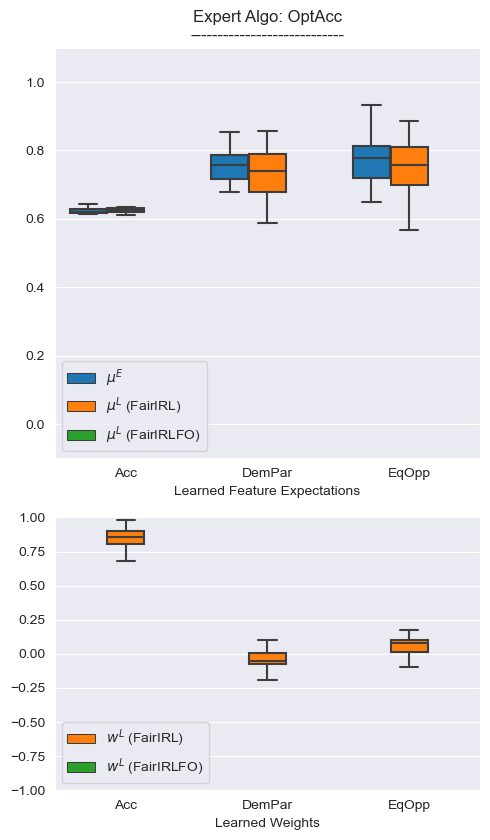

In [27]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
#     extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    extra_skip_conditions=skip_irl_error_norm_true,
    min_exp_timestamp=min_exp_timestamp,
)

DATASET: COMPAS


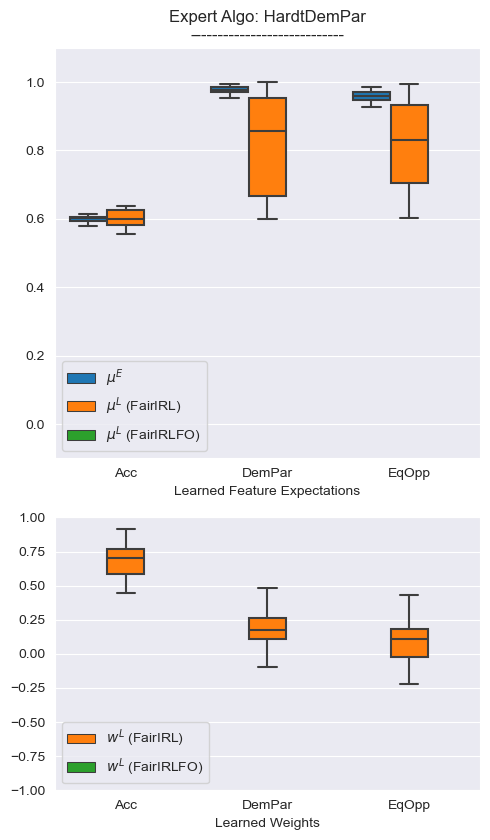

In [28]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
#     extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    extra_skip_conditions=skip_irl_error_norm_true,
    min_exp_timestamp=min_exp_timestamp,
)

DATASET: COMPAS


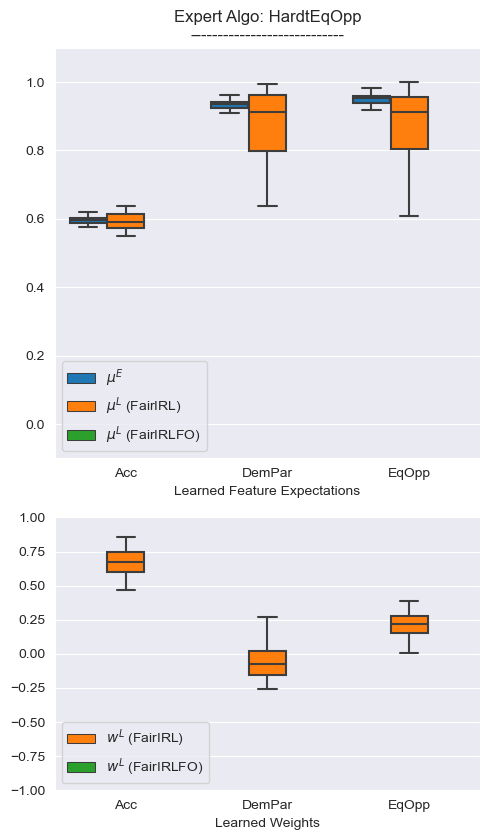

In [29]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
#     extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    extra_skip_conditions=skip_irl_error_norm_false,
    min_exp_timestamp=min_exp_timestamp,
)

# Compare results with target domain

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


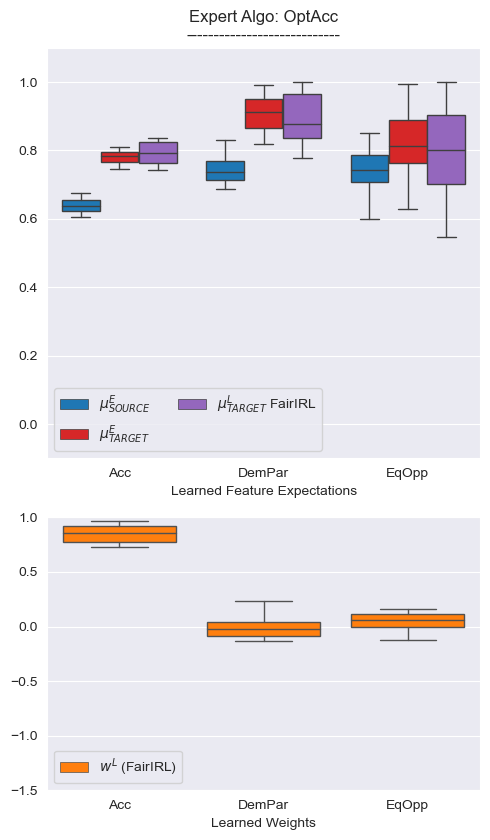

In [30]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_irl_error_norm_false,
    min_exp_timestamp=min_exp_timestamp,
)

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


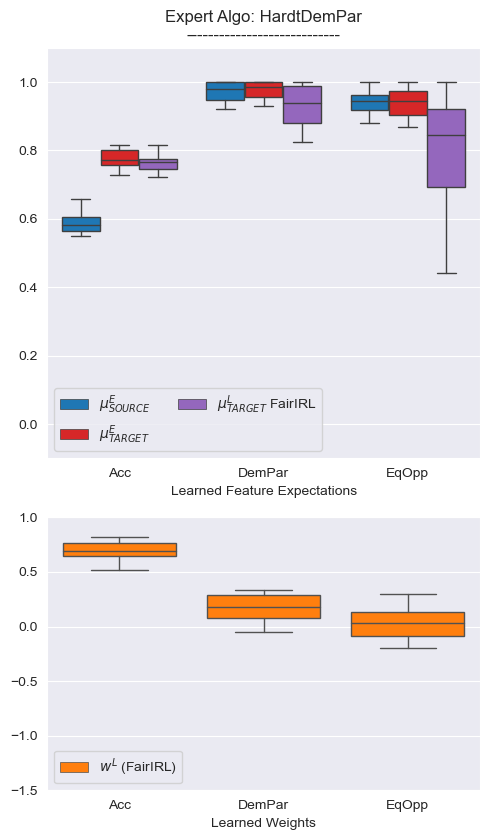

In [31]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_irl_error_norm_false,
    min_exp_timestamp=min_exp_timestamp,
)

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


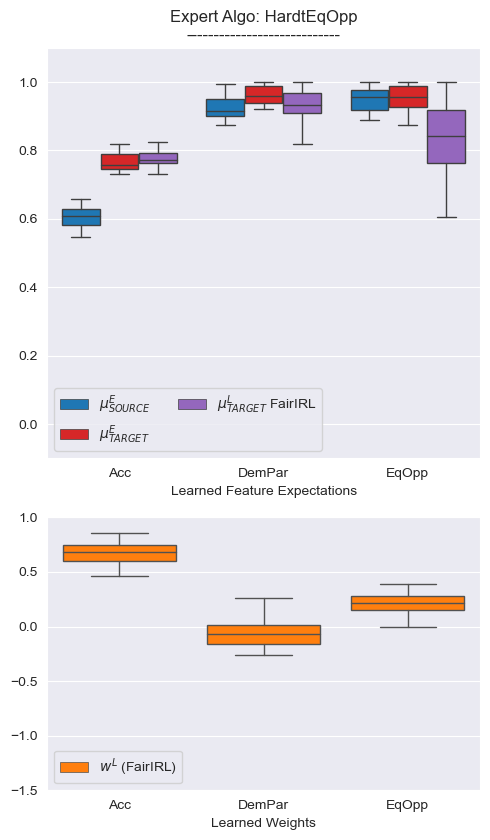

In [32]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_irl_error_norm_false,
    min_exp_timestamp=min_exp_timestamp,
)

# Scratch